This project aims to conduct a comprehensive Exploratory Data Analysis (EDA) on a sneaker sales dataset consisting of 500 records and 22 features. The dataset includes detailed attributes such as product name, production and sales figures, damage rates, pricing, release types, sales dates, performance scores, and estimated revenue.

The goal is to uncover actionable insights regarding inventory efficiency, product quality, customer preferences, and revenue patterns to support strategic decision-making in the sneaker business.

✅ Project Objectives
- Analyze unsold inventory patterns to identify overproduced products or low-demand models.
- Evaluate product quality by inspecting damage rates and performance scores.
- Understand consumer behavior based on gender preferences and sell-through rates.
- Assess revenue trends over years and across different edition types.
- Identify top-performing sneakers and problematic products to guide future production and marketing strategies.

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/500-snickers-dataset/snicker_dataset_with_dates.csv
/kaggle/input/500-snickers-dataset/sneakers.csv


# Read Dataset

In [2]:
data = pd.read_csv('/kaggle/input/500-snickers-dataset/sneakers.csv')
data.head()

,Product_Name,Product_Type,Total_Produced,Total_Sold,Damaged_Units,Month,Year,Edition_Type,Unit_Price,Target_Gender,...,Unsold_Inventory,Estimated_Revenue,Quarter,Snapshot_Date,Price_Bucket,Manufacturing_Date,Selling_Date,Performance_Score,Sneaker_Grade,Units_Received
0,Nike Air Force 1 '07 Sneakers,Creamy,24592,5819,9012,September,2017,Limited,115,Men,...,9761,669185,Q3,9/1/2017,High,9/1/2017,11/6/2017,-12.983897,E,24592
1,Adidas Originals Samba OG Shoes,Creamy,81482,16395,38698,September,2019,Standard,100,Men,...,26389,1639500,Q3,9/1/2019,Mid,9/1/2019,9/30/2019,-27.371689,E,81482
2,Air Jordan 1 Mid Shoes,Peanut Butter,76237,8478,26062,January,2023,Special Release,110,Women,...,41697,932580,Q1,1/1/2023,High,1/1/2023,3/28/2023,-23.064916,E,76237
3,Red Tape Casual Sneakers,Brownie,46463,5425,10463,October,2022,Anniversary,35,Men,...,30575,189875,Q4,10/1/2022,Low,10/1/2022,12/15/2022,-10.843036,E,46463
4,Nike Court Vision Low Shoes,Peanut Butter,54118,11698,6078,April,2019,Standard,80,Women,...,36342,935840,Q2,4/1/2019,Mid,4/1/2019,5/6/2019,10.384715,D,54118


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_Name        500 non-null    object 
 1   Product_Type        500 non-null    object 
 2   Total_Produced      500 non-null    int64  
 3   Total_Sold          500 non-null    int64  
 4   Damaged_Units       500 non-null    int64  
 5   Month               500 non-null    object 
 6   Year                500 non-null    int64  
 7   Edition_Type        500 non-null    object 
 8   Unit_Price          500 non-null    int64  
 9   Target_Gender       500 non-null    object 
 10  Sell_Through_Rate   500 non-null    object 
 11  Damage_Rate         500 non-null    object 
 12  Unsold_Inventory    500 non-null    int64  
 13  Estimated_Revenue   500 non-null    int64  
 14  Quarter             500 non-null    object 
 15  Snapshot_Date       500 non-null    object 
 16  Price_Bu

The dataset contains 500 rows and 22 columns representing sneaker-related data, including attributes such as:
Product_Name, Product_Type, Total_Produced, Total_Sold, Damaged_Units, Month, Year, Edition_Type, Unit_Price, Target_Gender, Sell_Through_Rate, Damage_Rate, Unsold_Inventory, Estimated_Revenue, Quarter, Snapshot_Date, Price_Bucket, Manufacturing_Date, Selling_Date, Performance_Score, Sneaker_Grade, Units_Received, and Damage_Percent.

It captures production volume, sales performance, quality metrics, target demographics, and financial results over a span of 10 years. The richness and completeness of the dataset allow for a comprehensive exploratory analysis from both product and business perspectives.

# Preprocess Data

## Duplicate value

In [4]:
# Check total duplicate value
data.duplicated().sum()

0

No duplicate records were found. This indicates good initial data hygiene and ensures no artificial inflation or redundancy in the analysis.

## Missing value

In [5]:
# Check total missing value
data.isna().sum()

Product_Name          0
Product_Type          0
Total_Produced        0
Total_Sold            0
Damaged_Units         0
Month                 0
Year                  0
Edition_Type          0
Unit_Price            0
Target_Gender         0
Sell_Through_Rate     0
Damage_Rate           0
Unsold_Inventory      0
Estimated_Revenue     0
Quarter               0
Snapshot_Date         0
Price_Bucket          0
Manufacturing_Date    0
Selling_Date          0
Performance_Score     0
Sneaker_Grade         0
Units_Received        0
dtype: int64

All fields are complete. This strengthens confidence in the integrity of any statistical and visual insights derived from the data.

## Outliers

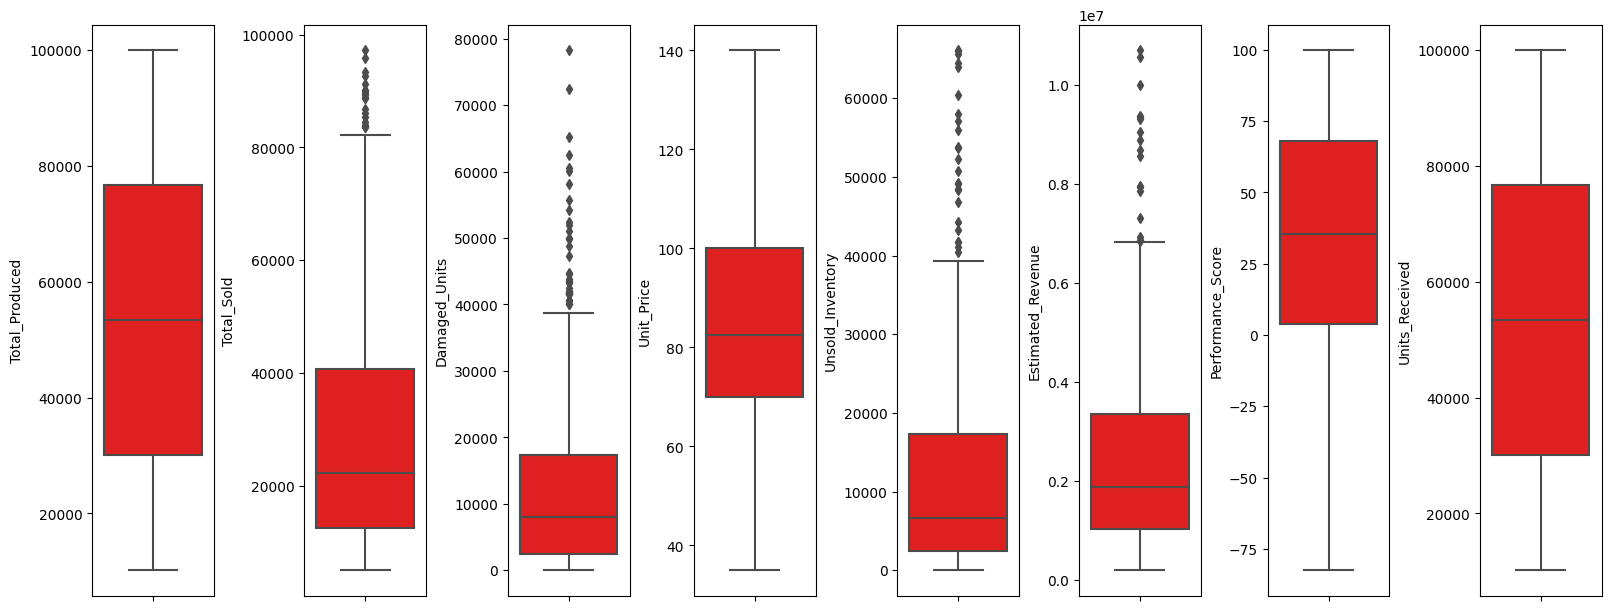

In [6]:
# Adjust the figure size for better readability
plt.figure(figsize=(16,6), layout='constrained')

# Plotting
features = ['Total_Produced', 'Total_Sold', 'Damaged_Units', 'Unit_Price', 'Unsold_Inventory', 'Estimated_Revenue', 'Performance_Score', 'Units_Received']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')

Boxplots reveal several outliers in: Total_Sold, Damaged_Units, Unsold_Inventory, Estimated_Revenue

These outliers should not be removed because:
- High Total_Sold values indicate highly successful products.
- Damaged_Units spikes may reflect real production issues worth investigating.
- Unsold_Inventory outliers can reveal inventory inefficiencies.
- Estimated_Revenue spikes are likely driven by best-selling, high-priced items.

Conclusion: These outliers are meaningful, not erroneous, and retaining them allows for richer, more realistic insights from the data.

# Exploratory Data Analysis (EDA)

## 1. Distribution & Production Analysis

### Top 5 Unsold Inventory

In [7]:
unsold_inventory = data.groupby(['Product_Name', 'Product_Type'])['Unsold_Inventory'].sum().reset_index().sort_values(by='Unsold_Inventory', ascending=False).head(5)
# unsold_inventory
unsold_inventory.reset_index()

,index,Product_Name,Product_Type,Unsold_Inventory
0,7,Adidas Originals Samba OG Shoes,Almond,159934
1,19,Air Jordan 1 Mid Shoes,Peanut Butter,150379
2,91,Red Tape Casual Sneakers,Almond,140503
3,15,Air Jordan 1 Mid Shoes,Brownie,132612
4,127,Under Armour Charged Assert 9,Crisper,127107


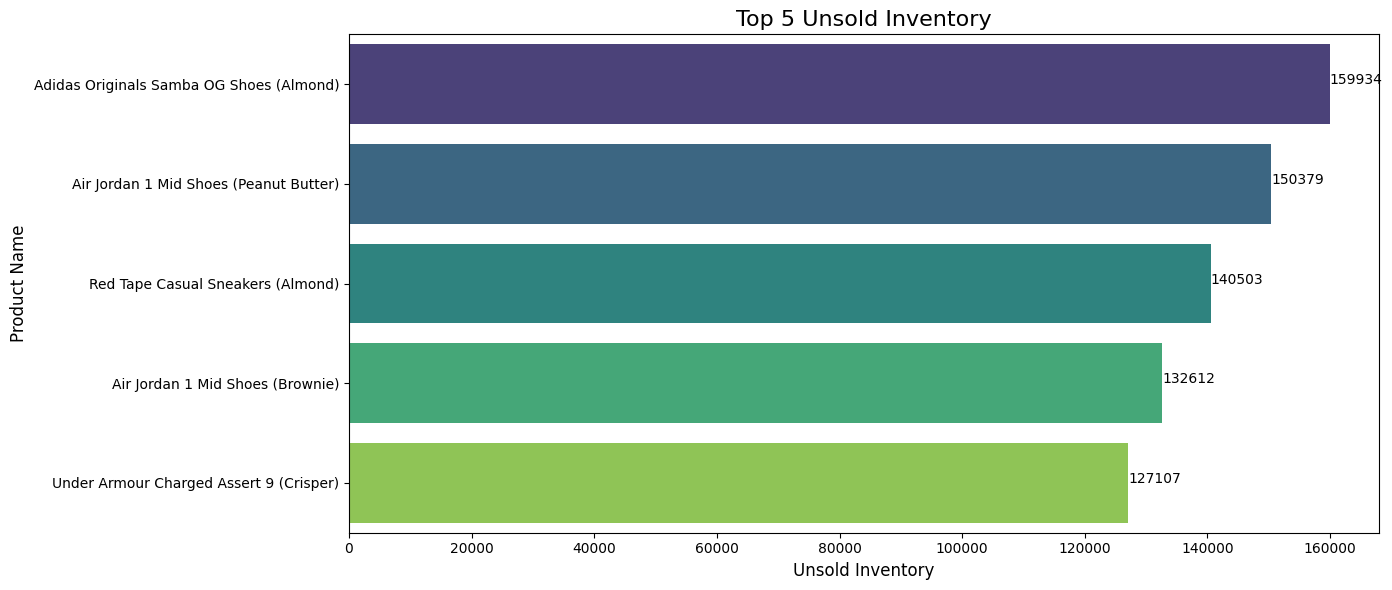

In [8]:
# Bar Chart Visualization
plt.figure(figsize=(14, 6))
sns.barplot(x=unsold_inventory['Unsold_Inventory'] , y=unsold_inventory['Product_Name'] + ' (' + unsold_inventory['Product_Type'] + ')', data=unsold_inventory, palette='viridis')

# Add number in bar chart
for i, count in enumerate(unsold_inventory['Unsold_Inventory']):
    plt.text(count, i, str(count))

# Add title and label
plt.title('Top 5 Unsold Inventory', fontsize=16)
plt.xlabel('Unsold Inventory', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

plt.tight_layout()
plt.show()

These include models such in different color variants. The high unsold inventory for these models may suggest:
- Overproduction,
- Weak market demand for specific colorways or editions, or
- Ineffective pricing or promotional strategies.

### Unsold Inventory By Grade

In [9]:
# Grouped data
unsold_by_grade = data.groupby('Sneaker_Grade')['Unsold_Inventory'].sum().reset_index(name='Unsold_Inventory')
unsold_by_grade

,Sneaker_Grade,Unsold_Inventory
0,A,271705
1,B,774434
2,C,1252879
3,D,2102821
4,E,1516793


Text(0.5, 1.0, 'Unsold Inventory By Grade')

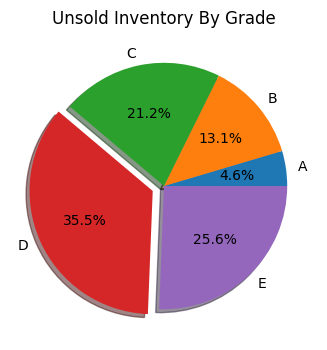

In [10]:
# Pie chart visualization
fig = plt.subplots(figsize=(8,4))
explode = (0, 0, 0, 0.1, 0)
plt.pie(x=unsold_by_grade['Unsold_Inventory'], labels=unsold_by_grade['Sneaker_Grade'], autopct='%.1f%%', pctdistance=0.6, explode=explode, shadow=True)
plt.title('Unsold Inventory By Grade')

Grade D contributes the most to unsold inventory (35.5%), followed by Grades E and C. This highlights a clear relationship between product quality (grade) and sales success. Lower grades are more likely to remain unsold, which reflects either:
- Customer sensitivity to perceived quality, or
- Limited trust in substandard products.

### Sneaker Purchases By Gender

In [11]:
# Grouped data
sell_by_gender = data.groupby('Target_Gender')['Total_Sold'].sum().reset_index(name='Total')
sell_by_gender

,Target_Gender,Total
0,Men,6700729
1,Women,7943521


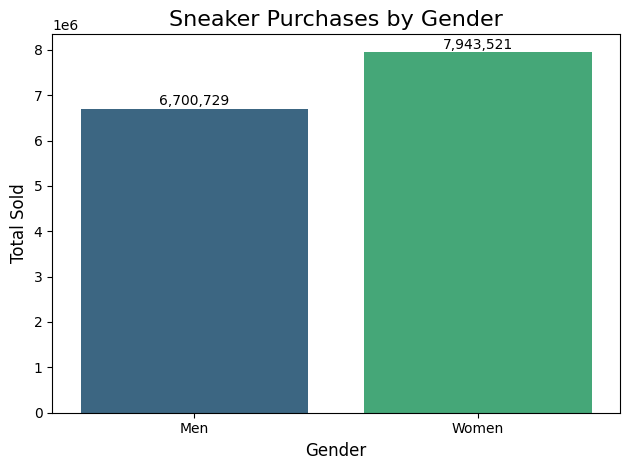

In [12]:
# Bar chart visualization
sns.barplot(x=sell_by_gender['Target_Gender'], y=sell_by_gender['Total'], data=sell_by_gender, palette='viridis')

# Add number on bar chart
for i, count in enumerate(sell_by_gender['Total']):
    # print(i)
    # print(count)
    plt.text(i, count + (0.01 * sell_by_gender['Total'].max()), f"{count:,.0f}",
             ha='center', fontsize=10, color='black')

# Add title and label
plt.title('Sneaker Purchases by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Sold', fontsize=12)

plt.tight_layout()
plt.show()

Female customers account for the majority of purchases. This might reflect:
- A more active female market segment in this product category,
- Effective marketing campaigns targeting women,
- Or a higher rate of sneaker turnover or fashion interest among female consumers.

## 2. Product Quality Analysis

### Top 10 Sneaker

In [13]:
top_performance = data.groupby('Product_Name')['Performance_Score'].mean().reset_index(name='Performance_Score').sort_values(by='Performance_Score', ascending=False).head(10)
top_performance.reset_index()

,index,Product_Name,Performance_Score
0,17,Superga 2750 Cotu Classic,52.849798
1,7,Lacoste Carnaby Evo,47.248430
2,11,Onitsuka Tiger Mexico 66,45.407320
3,14,Reebok Classic Leather,40.206539
4,2,Air Jordan 1 Mid Shoes,38.631739
5,5,Fila Disruptor II Premium,37.419469
6,12,Puma Smash V2 Sneakers,37.153740
7,4,Converse Chuck Taylor All Star,35.075101
8,3,Columbia Trailstorm Waterproof,34.838083
9,16,Skechers D'Lites,34.448403


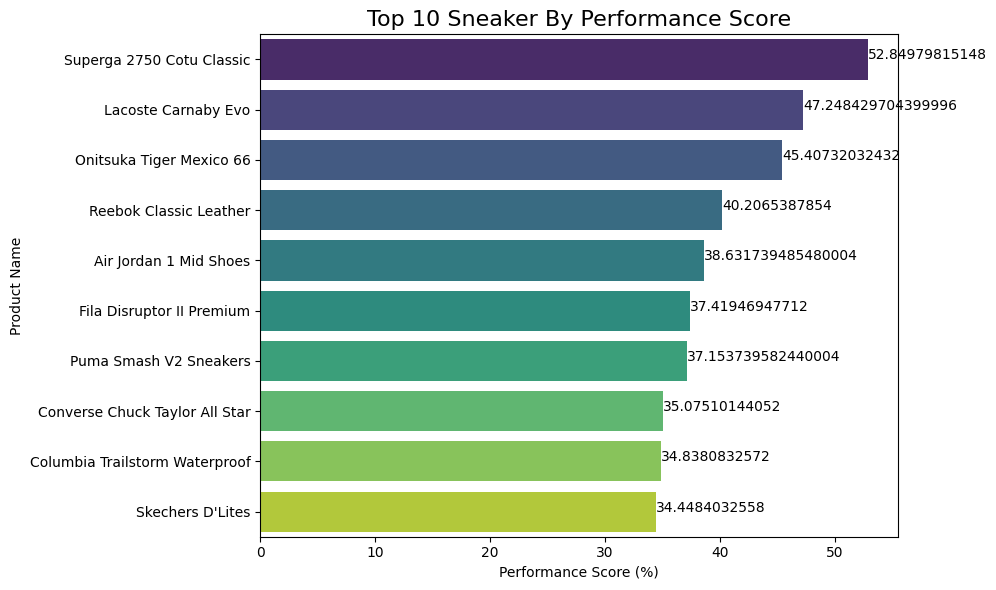

In [14]:
# Bar chart vizualisation
plt.figure(figsize=(10, 6))
sns.barplot(x=top_performance['Performance_Score'], y=top_performance['Product_Name'], data=top_performance, palette='viridis')

#Add title and label
for i, count in enumerate(top_performance['Performance_Score']):
    plt.text(count, i, str(count))
plt.title('Top 10 Sneaker By Performance Score', fontsize=16)
plt.xlabel('Performance Score (%)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

Models like Superga 2750, Lacoste Carnaby Evo, and Reebok Classic Leather consistently rank high. These are likely considered high-performing due to:
- Customer satisfaction,
- Low return/damage rates,
- Or positive post-sale metrics like reviews or durability.

Brands with consistently high scores could be prioritized for future investment, partnerships, or premium pricing strategies.

### Sneaker Puchases By Edition

In [15]:
edition = data.groupby('Edition_Type')['Total_Sold'].sum().reset_index(name='Total_Sold')
edition

,Edition_Type,Total_Sold
0,Anniversary,3345090
1,Holiday,2755861
2,Limited,2571662
3,Special Release,3129132
4,Standard,2842505


Text(0.5, 1.0, 'Sneaker Purchases By Edition')

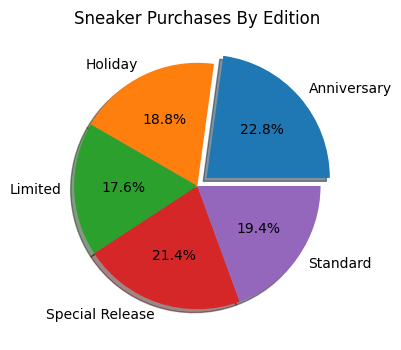

In [16]:
# Pie chart visualization
fig = plt.subplots(figsize=(8,4))
explode = (0.1, 0, 0, 0, 0)
plt.pie(x=edition['Total_Sold'], labels=edition['Edition_Type'], autopct='%.1f%%', pctdistance=0.6, explode=explode, shadow=True)
plt.title('Sneaker Purchases By Edition')

There is a relatively balanced distribution across all edition types, with Anniversary (22.8%) and Special Release (21.4%) leading. This indicates a diversified edition strategy. However, the spread suggests no single edition type dominates, which could be interpreted as:
- A flexible marketing approach, or
- Lack of a focused product positioning strategy.

### 5 Products with the Highest Damage

In [17]:
data['Damage_Percent'] = round(data['Damaged_Units']/data['Total_Produced'] * 100, 2)
data.head()

,Product_Name,Product_Type,Total_Produced,Total_Sold,Damaged_Units,Month,Year,Edition_Type,Unit_Price,Target_Gender,...,Estimated_Revenue,Quarter,Snapshot_Date,Price_Bucket,Manufacturing_Date,Selling_Date,Performance_Score,Sneaker_Grade,Units_Received,Damage_Percent
0,Nike Air Force 1 '07 Sneakers,Creamy,24592,5819,9012,September,2017,Limited,115,Men,...,669185,Q3,9/1/2017,High,9/1/2017,11/6/2017,-12.983897,E,24592,36.65
1,Adidas Originals Samba OG Shoes,Creamy,81482,16395,38698,September,2019,Standard,100,Men,...,1639500,Q3,9/1/2019,Mid,9/1/2019,9/30/2019,-27.371689,E,81482,47.49
2,Air Jordan 1 Mid Shoes,Peanut Butter,76237,8478,26062,January,2023,Special Release,110,Women,...,932580,Q1,1/1/2023,High,1/1/2023,3/28/2023,-23.064916,E,76237,34.19
3,Red Tape Casual Sneakers,Brownie,46463,5425,10463,October,2022,Anniversary,35,Men,...,189875,Q4,10/1/2022,Low,10/1/2022,12/15/2022,-10.843036,E,46463,22.52
4,Nike Court Vision Low Shoes,Peanut Butter,54118,11698,6078,April,2019,Standard,80,Women,...,935840,Q2,4/1/2019,Mid,4/1/2019,5/6/2019,10.384715,D,54118,11.23


In [18]:
top_damage = data.groupby(['Product_Name'])['Damage_Percent'].mean().reset_index().sort_values(by='Damage_Percent', ascending=False).head(5)
top_damage['Damage_Percent'] = round(top_damage['Damage_Percent'], 2)
top_damage

,Product_Name,Damage_Percent
6,Hoka One One Clifton 8,28.74
8,New Balance 574 Core,28.35
18,Under Armour Charged Assert 9,26.69
10,Nike Court Vision Low Shoes,26.26
15,Saucony Jazz Original,25.78


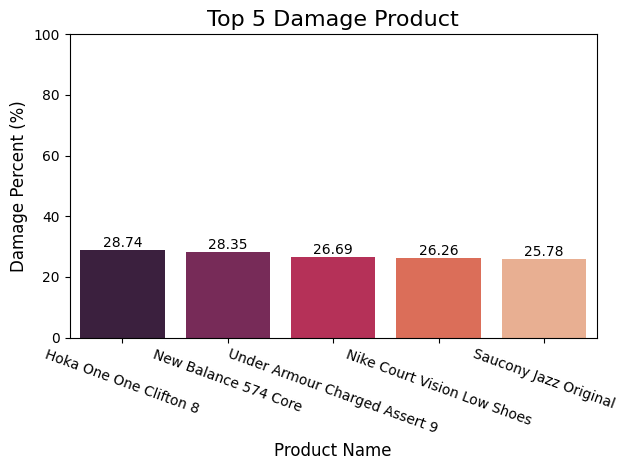

In [19]:
# Bar Chart Visualization
ax = sns.barplot(x=top_damage['Product_Name'] , y=top_damage['Damage_Percent'], data=top_damage, palette='rocket')

# Add title and label
ax.bar_label(ax.containers[0], fontsize=10)
plt.ylim(0, 100)
plt.title('Top 5 Damage Product', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Damage Percent (%)', fontsize=12)
plt.xticks(rotation=-20)
plt.tight_layout()
plt.show()

Models such as Hoka One One Clifton 8 and New Balance 574 Core have notably high damage percentages (above 25%). These high rates likely increase operational costs and hurt brand reputation. The causes could be:
- Poor material quality,
- Manufacturing process issues,
- Or inadequate product testing.

## 3. Revenue Analysis

### Total Revenue 2015-2024

In [20]:
revenue_by_year = data.groupby('Year')['Estimated_Revenue'].sum().reset_index(name='Total_Revenue').sort_values(by='Year', ascending=True)
revenue_by_year['Revenue_Million'] = [r / 1_000_000 for r in revenue_by_year['Total_Revenue']]
revenue_by_year.reset_index()

,index,Year,Total_Revenue,Revenue_Million
0,0,2015,114549345,114.549345
1,1,2016,141758420,141.758420
2,2,2017,114926245,114.926245
3,3,2018,117797575,117.797575
4,4,2019,126844355,126.844355
5,5,2020,136214690,136.214690
6,6,2021,126058300,126.058300
7,7,2022,137304600,137.304600
8,8,2023,122421490,122.421490
9,9,2024,109561425,109.561425


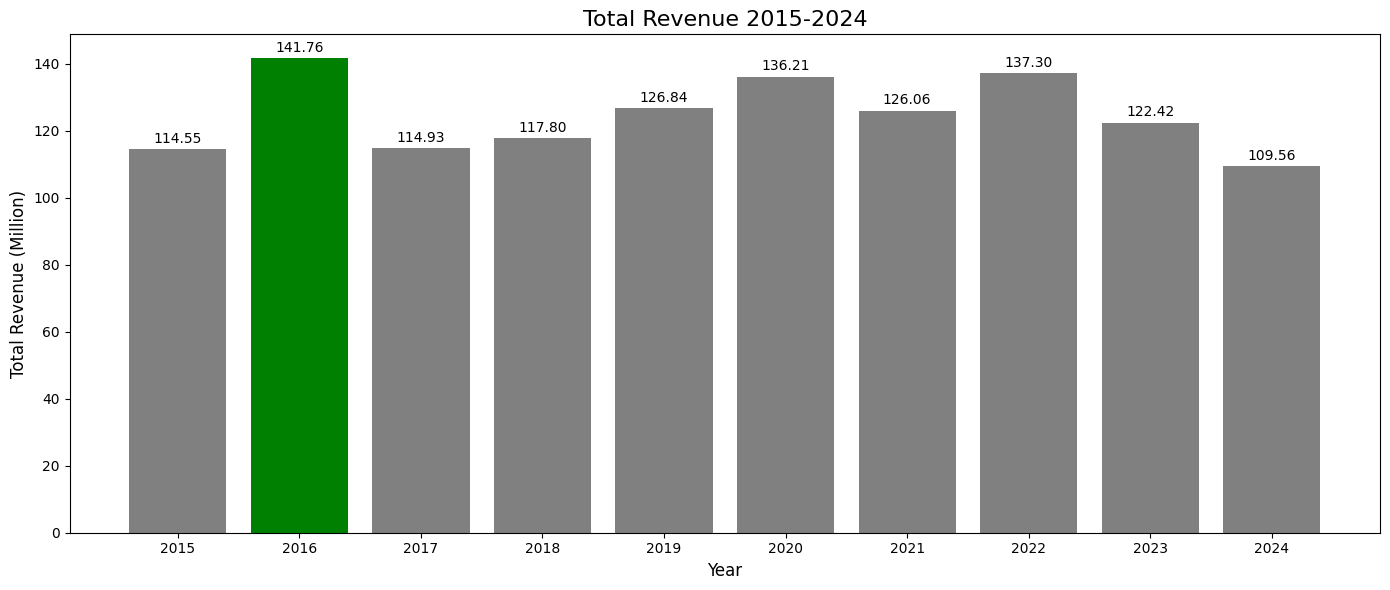

In [21]:
# Bar Chart Visualization
plt.figure(figsize=(14, 6))
colors = ['grey' if i != revenue_by_year['Revenue_Million'].idxmax() else 'green' for i in range(len(revenue_by_year))]
bars = plt.bar(revenue_by_year['Year'], revenue_by_year['Revenue_Million'], color=colors)

# Add title and label
for bar, revenue in zip(bars, revenue_by_year['Revenue_Million']):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 1,
             f"{revenue:.2f}",
             ha='center', va='bottom', fontsize=10)
plt.title('Total Revenue 2015-2024', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue (Million)', fontsize=12)
plt.xticks(revenue_by_year['Year'])
plt.tight_layout()
plt.show()

Revenue peaked in 2016 at $141.8 million and showed fluctuations across the years. The decline in recent years (especially 2023–2024) may signal:
- Market saturation,
- Ineffective product releases,
- Macroeconomic conditions (e.g., post-COVID spending behavior),
- Or increasing competition.

Maintaining stable growth may require innovation, better alignment with consumer preferences, and more efficient inventory management.

### Total Revenue By Edition Each Year

In [22]:
revenue_by_edition = data.groupby(['Year', 'Edition_Type'])['Estimated_Revenue'].sum().reset_index(name='Total_Revenue').sort_values(by='Year', ascending=True)
revenue_by_edition['Revenue_Million'] = [r / 1_000_000 for r in revenue_by_edition['Total_Revenue']]
revenue_by_edition

,Year,Edition_Type,Total_Revenue,Revenue_Million
0,2015,Anniversary,35294635,35.294635
1,2015,Holiday,25680715,25.680715
2,2015,Limited,32303035,32.303035
3,2015,Special Release,14426845,14.426845
4,2015,Standard,6844115,6.844115
5,2016,Anniversary,41632450,41.632450
6,2016,Holiday,29565490,29.565490
7,2016,Limited,19536290,19.536290
8,2016,Special Release,26094040,26.094040
9,2016,Standard,24930150,24.930150


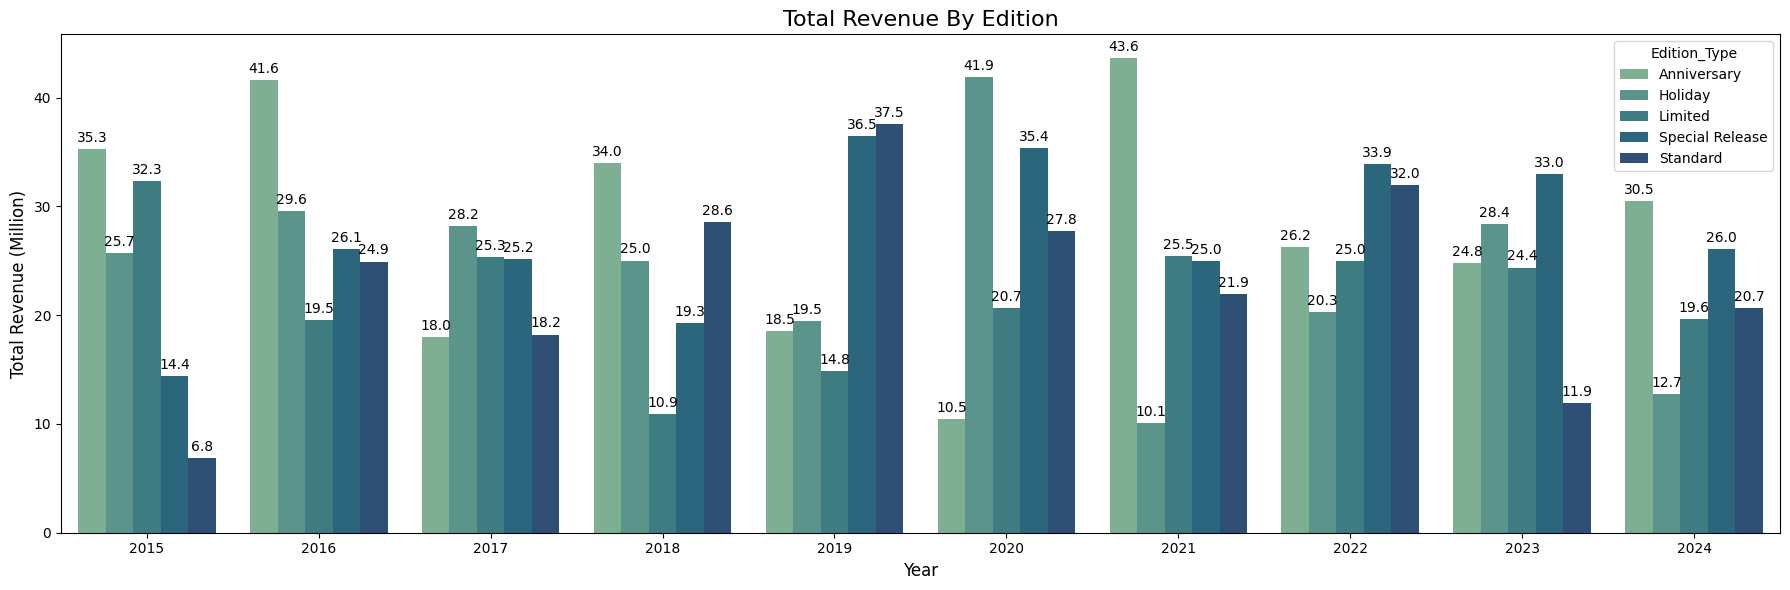

In [23]:
# Bar Chart Visualization
plt.figure(figsize=(18,6))
ax = sns.barplot(x=revenue_by_edition['Year'], y=revenue_by_edition['Revenue_Million'], data=revenue_by_edition, hue=revenue_by_edition['Edition_Type'], palette='crest')

# Add label and title
for container in ax.containers:
    ax.bar_label(container, labels=[f"{val:.1f}" for val in container.datavalues],
                 label_type='edge', padding=3, fontsize=10)
plt.title('Total Revenue By Edition', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue (Million)', fontsize=12)
plt.tight_layout()
plt.show()

Different edition types drove revenue in different years:
- Holiday and Special Release contributed significantly in 2020,
- Standard editions led in 2019 and 2022,
- Anniversary performed well in 2016 and 2021.

This reflects strong seasonality and suggests that timely, thematic releases are essential for maximizing yearly revenue. However, inconsistent top performers each year also suggest that not all editions yield the same return year over year.

# Recommendation

**1. Optimize Inventory Management**

Issue: High unsold inventory, particularly among lower-grade sneakers (Grade D and E).

Recommendation:
   - Implement demand forecasting models (e.g., time series, machine learning) to better estimate production needs.
   - Limit production of low-grade or poor-performing models and invest more in best-selling, high-performance products.
   - Introduce seasonal clearance sales or bundle strategies to reduce unsold stock.



     
**2. Improve Product Quality**

Issue: High damage rates in several models (e.g., Hoka, New Balance).

Recommendation:
   - Conduct a quality control audit across the supply chain and manufacturing process.
   - Reevaluate materials and design for models with the highest damage rates.
   - Introduce a "Quality Certification" label for sneakers that pass durability and performance benchmarks to build consumer trust.

**3. Focus on Female Consumer Segment**

Issue: Women dominate sneaker purchases.

Recommendation:
- Launch women-centric collections or campaigns, possibly in collaboration with female influencers or designers.
- Explore limited edition drops tailored to female trends and preferences.
- Design the UX/UI of the online store and marketing funnel with this target demographic in mind.

**4. Leverage High-Performing Products**

Issue: Certain models consistently score high in performance (e.g., Superga, Reebok Classic, Converse).

Recommendation:
- Use these as hero products in marketing campaigns.
- Expand their variants (colors, editions, collaborations) and maintain their availability year-round.
- Analyze their features (materials, pricing, marketing approach) as a blueprint for future product development.

**5. Optimize Revenue Strategy by Edition Type**

Issue: Revenue is inconsistent across edition types and years.

Recommendation:
- Identify best-performing editions per season/year, and align production with those trends.
- Scale back on low-performing editions or merge them into broader, more marketable releases.
- Introduce predictive analytics to anticipate which edition types will perform well based on past years and current trends.

**6. Stabilize Long-Term Revenue Growth**

Issue: Revenue peaked in 2016 and declined in recent years (2023–2024).

Recommendation:
- Investigate external market forces (e.g., competition, economic shifts) contributing to the decline.
- Strengthen brand loyalty programs to retain customers over time.
- Explore new market segments (e.g., kids, sustainable sneakers) or international expansion if applicable.

**7. Promote Sustainable Practices**

Issue: High damage and unsold units impact environmental sustainability and profitability.

Recommendation:
- Develop eco-friendly editions with recyclable materials and market them as limited drops.
- Implement a buy-back or donation program for unsold or slightly damaged inventory.
- Publicize sustainability metrics in branding to appeal to conscious consumers.